<a href="https://colab.research.google.com/github/CanKeles5/SequenceModels/blob/main/TEIA%C5%9E_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To-Do:
  Train using only one feature. NaturalGas

  Inspect the data and drop columns that are too sparse. See how many of the values in each col are zero.

++++ 1-  Give all features except total and natural gas and predict NG.


2-  Use 1-2 years data and do forecasting. 

In [ ]:
import torch
torch.cuda.is_available()
if torch.cuda.is_available():
  dev = "cuda:0"
else:
  dev = "cpu"
device = torch.device(dev)

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
%matplotlib inline

In [ ]:
! pip install pickle5

     |████████████████████████████████| 133kB 8.6MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp36-cp36m-linux_x86_64.whl size=218610 sha256=48723d160b471f90ff82d98c154e671c915e39ef21acbce56b55efcf6076ce09
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
import pickle5
from math import sqrt
from datetime import datetime
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
with open('/content/20210101-epias-raw.pkl', 'rb') as f:
    data = pickle5.load(f)

Drop all colums of zeros: df.loc[:, (df != 0).any(axis=0)]


In [ ]:
new_data = data.loc[:, (data != 0).any(axis=0)] #(index=False)

In [ ]:
new_data = new_data.sample(frac = 1) 

In [ ]:
new_data = new_data.drop(['date', 'ltotal',	'lwind',	'lbiogas',	'lcanalType',	'lbiomass',	'lsun',	'lothers', 'total'], axis=1)

In [ ]:
new_data

,fueloil,blackCoal,lignite,geothermal,naturalGas,river,dammedHydro,lng,biomass,naphta,importCoal,asphaltiteCoal,wind,sun,importExport
22103,163.30,171.00,3849.33,450.76,8457.64,733.60,4185.70,9.4,151.29,0.0,5237.60,134.68,1626.94,0.00,0.00
18099,182.70,326.50,2949.42,342.76,8046.40,3207.30,2031.98,4.6,133.59,0.0,3937.75,91.73,475.22,0.00,0.00
56734,35.50,391.53,5172.13,1022.78,2394.62,1057.91,3427.18,0.0,371.74,0.0,7963.31,340.02,1784.65,0.00,364.00
2132,28.00,206.00,3576.25,0.00,10203.05,111.71,3612.63,4.6,53.41,0.0,2030.00,0.00,287.56,0.00,0.00
20196,202.30,473.00,3652.99,278.50,16353.19,1934.23,11702.98,8.7,125.59,0.0,5127.74,134.68,1014.36,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,27.30,147.00,2429.30,0.00,11001.51,74.82,764.00,9.0,50.33,0.0,1953.00,0.00,366.98,0.00,0.00
60681,29.80,260.59,4293.00,1109.97,2139.51,4548.37,11012.04,0.0,407.94,0.0,4492.96,203.13,3053.73,119.29,-8.15
53334,200.80,328.00,4401.55,863.52,3767.21,4215.21,12475.76,0.0,378.24,0.0,4715.08,242.88,560.93,56.05,289.95
7766,274.30,321.50,4192.62,231.98,13170.53,1540.80,5254.26,8.9,96.45,5.0,3610.74,136.89,1144.79,0.00,0.00


In [ ]:
target = new_data.drop(['fueloil',	'blackCoal',	'lignite',	'geothermal',	'river',	'dammedHydro',	'lng',	'biomass',	'naphta',	'importCoal',	'asphaltiteCoal',	'wind',	'sun',	'importExport'], axis=1)

In [ ]:
target = target.to_numpy()

In [ ]:
data = new_data.drop(['naturalGas'], axis=1)

In [ ]:
data = data.to_numpy()

To-do:
  Get the data in such a format that it can work with the other notebook.
  
  1- Extract the date element.

  2- Normalize all features in the input part of the data.

  3- Create the inputs and the targets.

  4- Create train and test sets.

  5- 

  6- 

In [ ]:
# integer encode direction
#encoder = LabelEncoder()
#new_data[:,4] = encoder.fit_transform(new_data[:,4])
# ensure all data is float

#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
target = scaler.fit_transform(target)

print(data_scaled.shape)
print(target_scaled.shape)
#reframed = series_to_supervised(scaled, n_hours, 1)
#print(reframed.shape)

TypeError: ignored

In [ ]:
n_train_hours = 50000
train_X = data[:n_train_hours, :]
train_y = target[:n_train_hours, :]
test_X = data[n_train_hours:, :]
test_y = target[n_train_hours:, :]

In [ ]:
'''
n_train_hours = 50000
train = reframed[:n_train_hours, :]
test = reframed[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
'''

'\nn_train_hours = 50000\ntrain = reframed[:n_train_hours, :]\ntest = reframed[n_train_hours:, :]\n# split into input and outputs\nn_obs = n_hours * n_features\ntrain_X, train_y = train[:, :n_obs], train[:, -n_features]\ntest_X, test_y = test[:, :n_obs], test[:, -n_features]\nprint(train_X.shape, len(train_X), train_y.shape)\n# reshape input to be 3D [samples, timesteps, features]\ntrain_X = train_X.reshape((train_X.shape[0], n_hours, n_features))\ntest_X = test_X.reshape((test_X.shape[0], n_hours, n_features))\nprint(train_X.shape, train_y.shape, test_X.shape, test_y.shape)\n'

In [ ]:
train_X[0]

tensor([[3.4160e-02, 0.0000e+00, 7.5076e-02, 2.9382e-03, 4.3775e-02, 3.1613e-02,
         4.8438e-01, 1.3818e-02, 0.0000e+00, 1.3406e-01, 9.5261e-04, 2.9150e-04,
         5.6725e-03, 7.4520e-01, 1.0881e-01]], device='cuda:0')

In [ ]:
train_y[10]

array([0.72496243])

In [ ]:
print(n_obs)

15


In [ ]:
class LSTM(nn.Module):

  def __init__(self):
    super(LSTM, self).__init__()

    self.lstm = nn.LSTM(input_size=14, hidden_size=50, num_layers=1)
    self.FC = nn.Linear(50, 1)

  def forward(self, input):
    pred, _ = self.lstm(input)

    pred = self.FC(pred.view(50))

    return pred

In [ ]:
model = LSTM().to(device)

In [ ]:
loss_function = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

In [ ]:
train_loss_hist = []
test_loss_hist = []

In [ ]:
train_X

tensor([[[3.4160e-02, 0.0000e+00, 7.5076e-02, 2.9382e-03, 4.3775e-02,
          3.1613e-02, 4.8438e-01, 1.3818e-02, 0.0000e+00, 1.3406e-01,
          9.5261e-04, 2.9150e-04, 5.6725e-03, 7.4520e-01, 1.0881e-01]]],
       device='cuda:0')

In [ ]:
for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0

  for i in range(train_X.shape[0]):
    data = torch.Tensor(train_X[i]).unsqueeze(0) #.unsqueeze(0)    
    data = data.to(device)

    optimizer.zero_grad()

    prediction = model(data)

    #print("Train --- prediction: " + str(prediction) + " , GT: " + str(train_y[i]))

    loss = loss_function(prediction, torch.Tensor([train_y[i]]).to(device))

    train_loss += loss.item()

    loss.backward()
    optimizer.step()

  with torch.no_grad():
    for i in range(test_X.shape[0]):
      data = torch.Tensor(test_X[i]).unsqueeze(0)#.unsqueeze(0)
      data = data.to(device)

      prediction = model(data)

      #print("Validate --- prediction: " + str(prediction) + " , GT: " + str(test_y[i]))

      loss = loss_function(prediction, torch.Tensor([test_y[i]]).to(device))
      test_loss += loss.item()

  train_loss = train_loss / train_X.shape[0]
  test_loss = test_loss / test_X.shape[0]

  train_loss_hist.append(train_loss)
  test_loss_hist.append(test_loss)

  print("Train loss: " +  str(train_loss) + " --- Test loss: " + str(test_loss))


TypeError: ignored

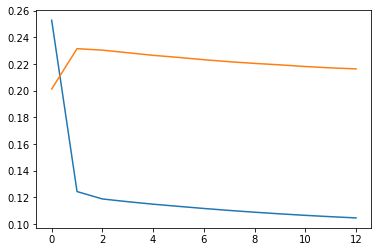

In [ ]:
pyplot.plot(train_loss_hist)
pyplot.plot(test_loss_hist)
